In [1]:
import pandas as pd
import numpy as np 
import json
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Import Dataset

In [2]:
# Read the dataset
data = pd.read_csv("../Data/compas-scores-two-years.csv")

## Data Exploration

## 1.- Numerical Exploration

In [3]:
# Initial look
data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [4]:
# Initial feature inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [5]:
# Exploratory statistics 
data.describe().transpose()

# Need to find why "days_b_screening_arrest" is negative

,count,mean,std,min,25%,50%,75%,max
id,7214.0,5501.255753,3175.706870,1.0,2735.25,5509.5,8246.5,11001.0
age,7214.0,34.817993,11.888922,18.0,25.00,31.0,42.0,96.0
juv_fel_count,7214.0,0.067230,0.473972,0.0,0.00,0.0,0.0,20.0
decile_score,7214.0,4.509565,2.856396,1.0,2.00,4.0,7.0,10.0
juv_misd_count,7214.0,0.090934,0.485239,0.0,0.00,0.0,0.0,13.0
juv_other_count,7214.0,0.109371,0.501586,0.0,0.00,0.0,0.0,17.0
priors_count,7214.0,3.472415,4.882538,0.0,0.00,2.0,5.0,38.0
days_b_screening_arrest,6907.0,3.304763,75.809505,-414.0,-1.00,-1.0,0.0,1057.0
c_days_from_compas,7192.0,57.731368,329.740215,0.0,1.00,1.0,2.0,9485.0
is_recid,7214.0,0.481148,0.499679,0.0,0.00,0.0,1.0,1.0


In [6]:
# Let's look at the total missing values per feature
print(data.isnull().sum())

# Let's look at percentage of missing values per feature
print("------ Percent of Total Feature -----------")
data.isnull().sum().apply(lambda x: round(x/7214,2)).sort_values(ascending=False)

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

violent_recid              1.00
vr_case_number             0.89
vr_charge_degree           0.89
vr_offense_date            0.89
vr_charge_desc             0.89
c_arrest_date              0.84
r_jail_out                 0.68
r_jail_in                  0.68
r_days_from_arrest         0.68
r_charge_desc              0.53
r_offense_date             0.52
r_case_number              0.52
r_charge_degree            0.52
c_offense_date             0.16
c_jail_in                  0.04
days_b_screening_arrest    0.04
c_jail_out                 0.04
in_custody                 0.03
out_custody                0.03
event                      0.00
end                        0.00
start                      0.00
priors_count.1             0.00
is_violent_recid           0.00
score_text                 0.00
v_screening_date           0.00
decile_score.1             0.00
v_decile_score             0.00
v_type_of_assessment       0.00
type_of_assessment         0.00
screening_date             0.00
v_score_

In [7]:
# Now I want to see how many unique values I have for each particular feature and the values 
for column in data.columns:
    print(f"---------{column}-----------")
    print(f"TOTAL UNIQUE VALUES: {data[column].nunique()}")
    print(f"UNIQUE VALUES: {data[column].unique()}")
    print(data[column].value_counts())
    print("\n\n")

---------id-----------
TOTAL UNIQUE VALUES: 7214
UNIQUE VALUES: [    1     3     4 ... 10999 11000 11001]
id
1        1
7386     1
7339     1
7338     1
7337     1
        ..
3661     1
3660     1
3659     1
3658     1
11001    1
Name: count, Length: 7214, dtype: int64



---------name-----------
TOTAL UNIQUE VALUES: 7158
UNIQUE VALUES: ['miguel hernandez' 'kevon dixon' 'ed philo' ... 'winston gregory'
 'farrah jean' 'florencia sanmartin']
name
anthony smith           3
christopher hamilton    2
carlos vasquez          2
leroy battie            2
roderick thomas         2
                       ..
dywahn bethea           1
marquita young          1
andre laidlaw           1
jamar dukes             1
florencia sanmartin     1
Name: count, Length: 7158, dtype: int64



---------first-----------
TOTAL UNIQUE VALUES: 2800
UNIQUE VALUES: ['miguel' 'kevon' 'ed' ... 'raheem' 'farrah' 'florencia']
first
michael        149
christopher    109
james           84
anthony         83
robert         

## Making Sense of the Data

In [8]:
# Let's look at column names 
data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [9]:
# Let's convert the dates to proper format make life easier
for column in data.columns:
    
    try:
        data[column] = pd.to_datetime(data[column], format='%Y-%m-%d').dt.date
    except:
        pass 

In [10]:
# Let's look for duplicated people outside of the main ID iddentifier 
data[['name', 'dob']].duplicated().sum()

0

In [11]:
# First I want to make sense of what means the c_ variables on arrest and Jail, how many people and understand chronological order
# Who got Jailed first 
print("Not Null Occurrences of 'c_jail_in':", data['c_jail_in'].count())
print("Not Null Occurrences of 'c_jail_out':", data['c_jail_out'].count())

# We Know that 6907 individuals originally went to Jail

# Is the c_ for the current jail time? lets investigate with the c_offense_date
print("Values for 'c_offense_date':", data["c_offense_date"].count())

# We don't really know what's this about, maybe some offenses have no date recorded. How about the 'c_arrest_date'
print("Values for 'c_arrest_date':", data["c_arrest_date"].count())

# We can't tell what's happening here really, let's actually look at the dates and figure it out from there
data[['c_offense_date', 'c_arrest_date','c_jail_in', 'c_jail_out']].head(15)


Not Null Occurrences of 'c_jail_in': 6907
Not Null Occurrences of 'c_jail_out': 6907
Values for 'c_offense_date': 6055
Values for 'c_arrest_date': 1137


,c_offense_date,c_arrest_date,c_jail_in,c_jail_out
0,2013-08-13,NaT,2013-08-13 06:03:42,2013-08-14 05:41:20
1,2013-01-26,NaT,2013-01-26 03:45:27,2013-02-05 05:36:53
2,2013-04-13,NaT,2013-04-13 04:58:34,2013-04-14 07:02:04
3,2013-01-12,NaT,NaN,NaN
4,NaT,2013-01-09,NaN,NaN
5,2013-11-30,NaT,2013-11-30 04:50:18,2013-12-01 12:28:56
6,2014-02-18,NaT,2014-02-18 05:08:24,2014-02-24 12:18:30
7,NaT,2013-08-29,2013-08-29 08:55:23,2013-08-30 08:42:13
8,2014-03-15,NaT,2014-03-15 05:35:34,2014-03-18 04:28:46
9,2012-12-31,NaT,2015-01-06 03:55:34,2015-01-07 03:38:44


In [12]:
# c_offense_date and c_arrest_date are not both recorded, but both cases did go to jail
data[['c_offense_date', 'c_arrest_date','c_jail_in', 'c_jail_out']][(~data['c_offense_date'].isna()) & (~data['c_arrest_date'].isna())]

# From the previous table, we can see that c_offense_date and c_arrest_date happen before c_jail_in

,c_offense_date,c_arrest_date,c_jail_in,c_jail_out


In [13]:
# Now lets look at how many resided aggain
print("Indiviudals that recided: ", data["is_recid"].sum())

# Is the featurs starting with r_ a value for the recided event?
print("Unique 'r_case_number': ", data['r_case_number'].count())
print("Unique 'r_offense_date': ", data['r_offense_date'].count())

# Do all individuals that recided went to Jail?
print("Recided to Jail: ", data['r_jail_in'].count())
print("Recided Jail Out: ", data['r_jail_out'].count())

# Let's look at the dates to make sure it makes sense 
data[["r_offense_date", "r_jail_in", "r_jail_out"]].dropna()

# We can see that r happens after c, we can also see that all R jail got out of Jail

Indiviudals that recided:  3471
Unique 'r_case_number':  3471
Unique 'r_offense_date':  3471
Recided to Jail:  2316
Recided Jail Out:  2316


,r_offense_date,r_jail_in,r_jail_out
2,2013-06-16,2013-06-16,2013-06-16
6,2014-03-31,2014-03-31,2014-04-18
9,2015-01-06,2015-01-06,2015-01-07
14,2014-06-03,2014-06-03,2014-11-19
15,2014-06-25,2014-06-25,2014-06-28
...,...,...,...
7194,2015-12-05,2015-12-06,2015-12-07
7195,2014-10-16,2015-04-09,2015-04-10
7205,2014-11-16,2014-11-16,2015-03-06
7207,2015-10-21,2015-10-22,2015-10-22


In [14]:
# We know that 3471 cases resided, how about the 'is_violent_recid'
print("Number of Violent Recid: ", data['is_violent_recid'].sum())

# 819 is less than 3471, lets see if the other featues match this number on violent recide 
print("Number of 'vr_case_number': ", data['vr_case_number'].count())

Number of Violent Recid:  819
Number of 'vr_case_number':  819


In [15]:
# So far we know that all had a type of assessment = Risk of Recidivism, reflected on 'decile_score'
# Let's check if the score text equals the compass result
low = data['decile_score'] < 5
medium = data['decile_score'].between(5,7)
high = data['decile_score'] >= 8
print("Low values equal score:", (data["score_text"] == "Low").sum() == len(data[low]))
print("Medium values equal score:", (data["score_text"] == "Medium").sum() == len(data[medium]))
print("High values equal score:", (data["score_text"] == "High").sum() == len(data[high]))

# How about the v_decile_score: from the v_type_of_assessment we know this is about violence, are they the same scores?
print("Cases when 'decile_score' different from 'v_decile_score': ", (data["decile_score"] == data["v_decile_score"]).sum())

Low values equal score: True
Medium values equal score: True
High values equal score: True
Cases when 'decile_score' different from 'v_decile_score':  2395


In [16]:
# So far we understand some chronological order of events, c_offence -> c_arrest -> c_jail_in -> c_jail_out -> r_offense_date -> r_jail_in -> r_jail_out
# We can see that the screening happened before the reciding offenses 
print("Has any screeing happened after going to jail again?: ", 0 > (data["screening_date"] > data['r_jail_in']).sum())

# Now let's look at the screening_date, when does this COMPAS Lvl belongs according to our dates 
data[['screening_date', 'c_jail_in', 'c_jail_out', 'r_offense_date', 'r_jail_in', 'r_jail_out']]

Has any screeing happened after going to jail again?:  False


,screening_date,c_jail_in,c_jail_out,r_offense_date,r_jail_in,r_jail_out
0,2013-08-14,2013-08-13 06:03:42,2013-08-14 05:41:20,NaT,NaT,NaT
1,2013-01-27,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-07-05,NaT,NaT
2,2013-04-14,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-06-16,2013-06-16,2013-06-16
3,2013-01-13,NaN,NaN,NaT,NaT,NaT
4,2013-03-26,NaN,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...
7209,2013-11-23,2013-11-22 05:18:27,2013-11-24 02:59:20,NaT,NaT,NaT
7210,2014-02-01,2014-01-31 07:13:54,2014-02-02 04:03:52,NaT,NaT,NaT
7211,2014-01-14,2014-01-13 05:48:01,2014-01-14 07:49:46,NaT,NaT,NaT
7212,2014-03-09,2014-03-08 08:06:02,2014-03-09 12:18:04,NaT,NaT,NaT


In [17]:
# Let's now look at in_custody
print("Values no NA in_custody", data['in_custody'].count())
data[['in_custody', 'out_custody', 'c_offense_date', 'c_jail_in', 'c_jail_out', 'r_offense_date', 'r_jail_in', 'r_jail_out']].head(15)

# In msot cases this in_custody is the last date of jail time, but is not always the case as the first row and other ones
# I will probably ingnore this feature, doesn't add up any information and missleading in some cases


Values no NA in_custody 6978


,in_custody,out_custody,c_offense_date,c_jail_in,c_jail_out,r_offense_date,r_jail_in,r_jail_out
0,2014-07-07,2014-07-14,2013-08-13,2013-08-13 06:03:42,2013-08-14 05:41:20,NaT,NaT,NaT
1,2013-01-26,2013-02-05,2013-01-26,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-07-05,NaT,NaT
2,2013-06-16,2013-06-16,2013-04-13,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-06-16,2013-06-16,2013-06-16
3,NaT,NaT,2013-01-12,NaN,NaN,NaT,NaT,NaT
4,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaT
5,2013-11-30,2013-12-01,2013-11-30,2013-11-30 04:50:18,2013-12-01 12:28:56,NaT,NaT,NaT
6,2014-03-31,2014-04-18,2014-02-18,2014-02-18 05:08:24,2014-02-24 12:18:30,2014-03-31,2014-03-31,2014-04-18
7,2014-05-22,2014-06-03,NaT,2013-08-29 08:55:23,2013-08-30 08:42:13,NaT,NaT,NaT
8,2014-03-15,2014-03-18,2014-03-15,2014-03-15 05:35:34,2014-03-18 04:28:46,NaT,NaT,NaT
9,2015-01-06,2015-01-07,2012-12-31,2015-01-06 03:55:34,2015-01-07 03:38:44,2015-01-06,2015-01-06,2015-01-07


In [18]:
# Now that we understand the chronology of events better, I want to go back on the feature days_b_screening_arrest
# I dont get why this is negative, first lets look at the  na values 
print("NA In days_b_screening_arrest", (data["days_b_screening_arrest"].isna()).sum())

# Looks like the NA is for cases that didn't go to jail at all: 307 if we remember that c_jail_in was 6907 this equal the total cases on data
# Then the days_b_screening_arrest must be related to c_jail_in
#((data["c_jail_in"] - data["screening_date"]).fillna(0) == data["days_b_screening_arrest"].fillna(0)).sum()

# Days before screaning is the date when first got to jail or arrested if didn't make it to jail yet 
# (5 cases are excepted but is no point looking more as we know is before r_jail)

NA In days_b_screening_arrest 307


In [19]:
# Has anyone not been in Jail at all
print("People that have been arrested (1 or 2 times) and not in jail: ", data[(data['c_jail_in'].isna()) & (data["r_jail_in"].isna())].shape[0])
print("People that got arrested, didn't go to Jail and didn't recide:", 295 - data[(data['c_jail_in'].isna()) & (data["r_jail_in"].isna())]['is_recid'].sum())


People that have been arrested (1 or 2 times) and not in jail:  295
People that got arrested, didn't go to Jail and didn't recide: 244


In [20]:
# How about the 'start' and 'end' features?
# So far is nothing I can infer on what they mean
(data['start'] > 0).sum()

2691

In [21]:
# What about the null c_case_number
data[data['c_case_number'].isna()][['in_custody', 'out_custody','c_arrest_date', 'c_offense_date', 'c_jail_in', 'c_jail_out', 'r_offense_date', 'r_jail_in', 'r_jail_out']]

# Is a couple of c_case_numbers lost around, this a small amount and an identifier 
# I don't understand how one case has a r_offense_date but no previous offense dates, looks like he might got arrested but no details of it and never made it to custody
# It also looks like cus

,in_custody,out_custody,c_arrest_date,c_offense_date,c_jail_in,c_jail_out,r_offense_date,r_jail_in,r_jail_out
190,NaT,NaT,NaT,NaT,NaN,NaN,2014-10-14,NaT,NaT
363,2013-03-30,2013-09-07,NaT,NaT,NaN,NaN,NaT,NaT,NaT
842,2014-03-23,2014-03-24,NaT,NaT,NaN,NaN,2014-09-11,NaT,NaT
962,2013-04-02,2013-04-10,NaT,NaT,NaN,NaN,NaT,NaT,NaT
1464,2014-11-15,2014-11-16,NaT,NaT,NaN,NaN,2014-11-15,2014-11-15,2014-11-16
2728,2013-04-23,2013-05-01,NaT,NaT,NaN,NaN,2013-07-02,2013-07-02,2013-09-04
2762,2014-07-23,2014-07-24,NaT,NaT,NaN,NaN,2015-01-09,NaT,NaT
3206,2014-04-21,2014-04-22,NaT,NaT,NaN,NaN,2014-04-21,2014-04-21,2014-04-22
3319,2015-03-09,2015-06-30,NaT,NaT,NaN,NaN,2015-03-09,2015-03-09,2015-06-30
3402,2014-02-25,2014-02-26,NaT,NaT,NaN,NaN,2014-02-25,2014-02-25,2014-02-26


From the last steps we can Identify:
- Everyone got arrested originally and from that they got a COMPAS screening
- From that original arrest who went to Jail first
- Who recided again
- Who went to jail again
- COMPAS lvl
- Understand the time of events and variables that belong to first arrest and second arrest.

At the same time we can find that we got many information that we dont need, if the propose of the data is to identify who will commit another crime.  
We now know that COMPAS screening happened on first arrest, any other feature on second arrest it couldn't be used to create the COMPAS lvl.  
For next step any other variable (after first Arrest) can be removed from the data as they are not previous identifiers on the risk of the individual to commit another crime.  
We will keep the outcome variables to help verify any accuracy on the COMPAS screeining and identifying bias:
- is_recid
- r_jail_in (create a new feature on who went to jail again)

## 2.- Visual Exploration 

Distribution of Age, Race, Sex 

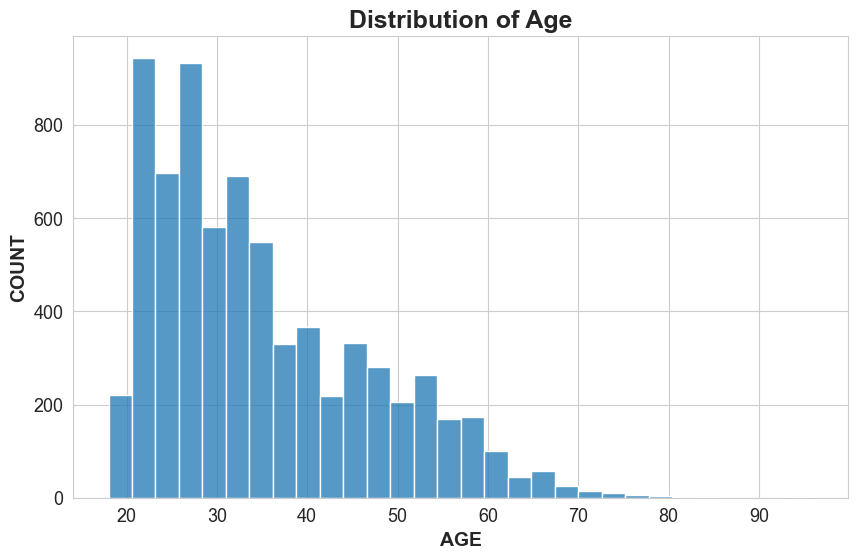

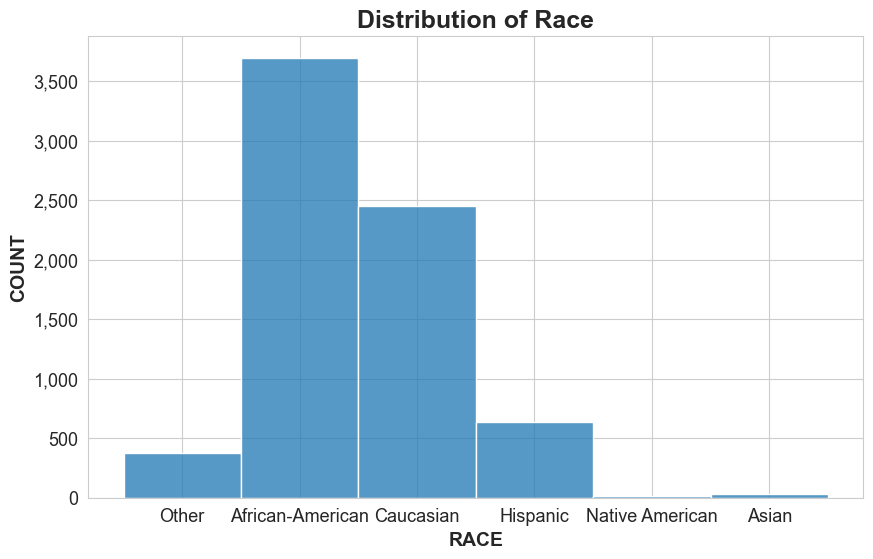

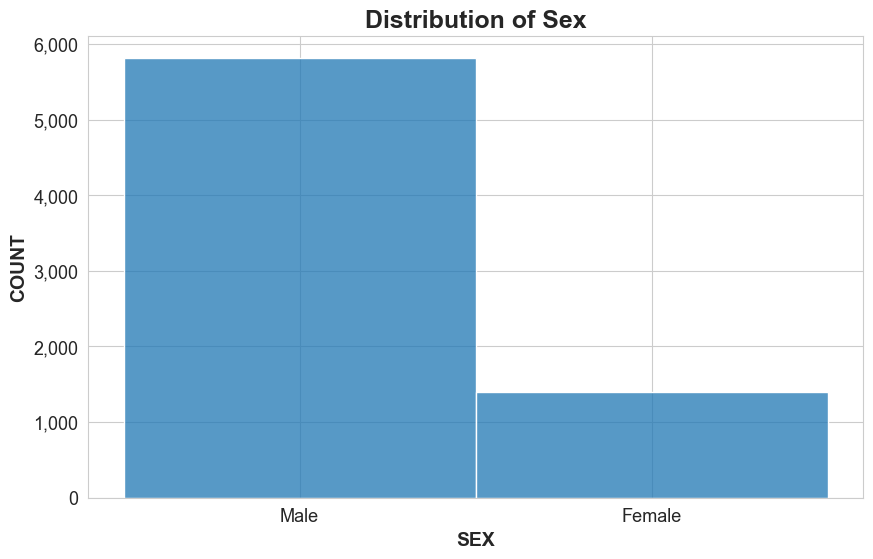

In [22]:
# Plot the Outcome of each individual feature
for feature in ['age', 'race', 'sex']:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(x=feature, data=data, bins=30)
    ax.set_title(f'Distribution of {feature.title()}', fontsize=18, fontweight='bold')
    ax.set_xlabel(feature.upper(), fontsize=14, fontweight='bold')
    ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')

    # Format x-axis and y-axis tick labels to add commas for values over thousands and increase tick label size
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.tick_params(axis='both', which='major', labelsize=13)

    plt.show()

From the last visuals, we can already identify that the distributions of gender and race seem a little bit different from what could be considered normal. We know that the  
COMPAS data comes from the USA, if we look at the USA distribution on sex, this is almost a 50-50 split. If we look at the race distribution, this split is White 75%,  
African-American 13%, Hispanic 19%. These figures are from 2023, the data is from 2015, but the figures for a whole country won't be changing drastically  
(United States Census Bureau, 2024).  

What this suggests is that the current data we have, if we take it as the whole source of information, already has some inherited bias in the distribution it's representing. This is a much deeper issue; for our case, we want to focus on the predictable outcome of the COMPAS screening.

Reference:
United States Census Bureau. (2024). QuickFacts: United States. Retrieved January 16, 2024, from https://www.census.gov/quickfacts/fact/table/US/PST045223

Individuals that went to Jail on First Arrest

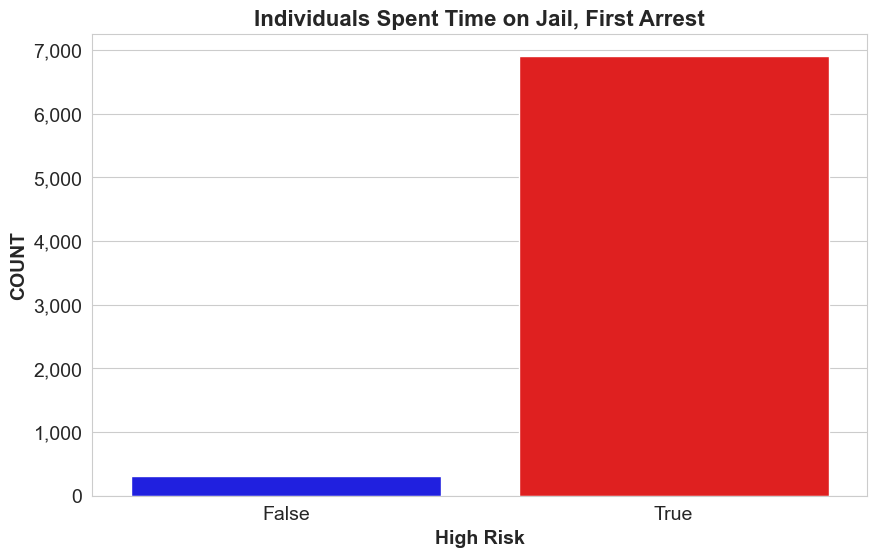

In [23]:
# Create a custom color palette
custom_palette = {False: 'blue', True: 'red'}

# Determine jail status based on r_jail_in column
data['went_to_jail'] = ~data['c_jail_in'].isnull()

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[['went_to_jail']], x ='went_to_jail', palette=custom_palette )
ax.set_title('Individuals Spent Time on Jail, First Arrest', fontsize=16, fontweight='bold')
ax.set_xlabel('High Risk', fontsize=14, fontweight='bold')
ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

As we saw previously everyone except 307 indiviudals spent some time in prision on the first arrest

HIgh Risk Individuals (level 8-10)

****** High Risk 8-10 **********
Total Individuals of High Risk: 1403
Percent of High Risk: 19.45%




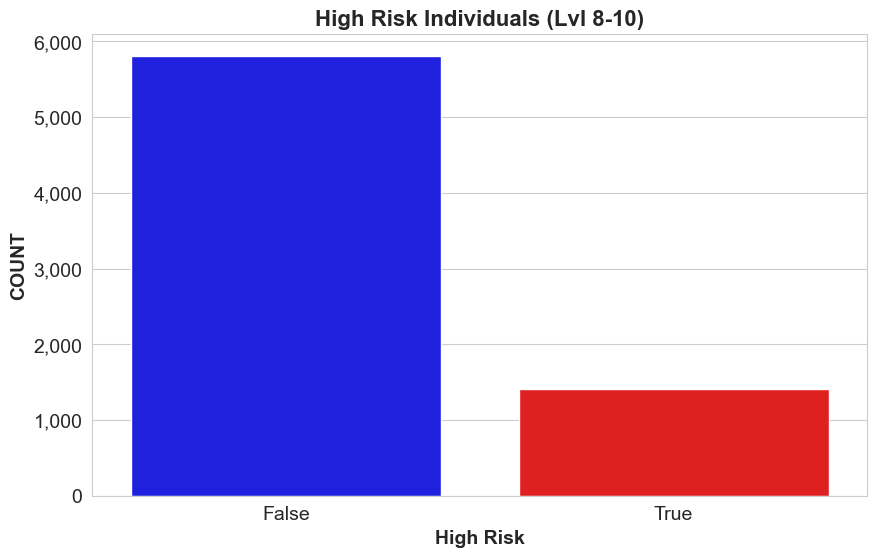

In [24]:
# identify high risk individuals for level 8-10
data['high_risk'] = data['decile_score'] > 7
print("****** High Risk 8-10 **********")
print("Total Individuals of High Risk:", data['high_risk'].sum())
print(f"Percent of High Risk: {data['high_risk'].sum()/7214*100:.2f}%\n\n")

# PLOT 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[['high_risk']], x ='high_risk', palette=custom_palette )
ax.set_title('High Risk Individuals (Lvl 8-10)', fontsize=16, fontweight='bold')
ax.set_xlabel('High Risk', fontsize=14, fontweight='bold')
ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()


If we take the predictability of the COMPAS screening at face value, we should only expect 19.45% of Individuals commiting a crime again

Distribution of High Risk Individials (8-10) across sensitive Features

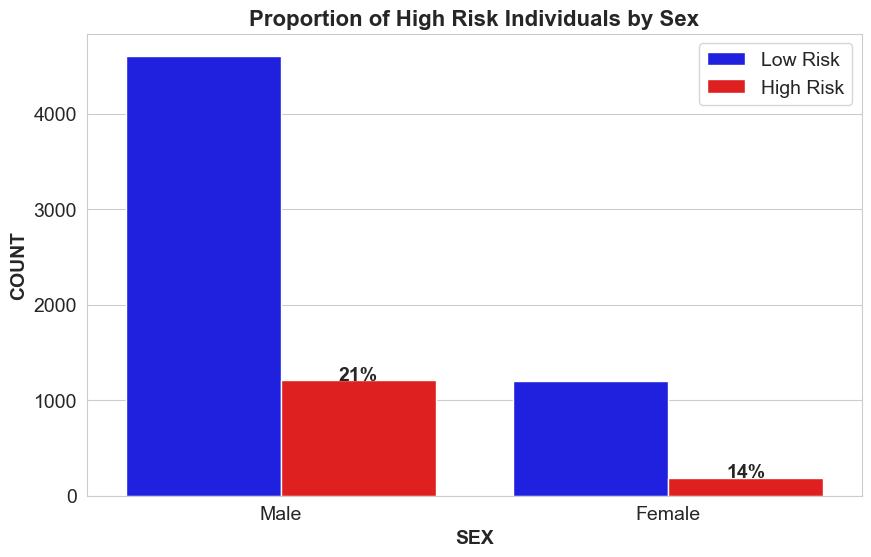

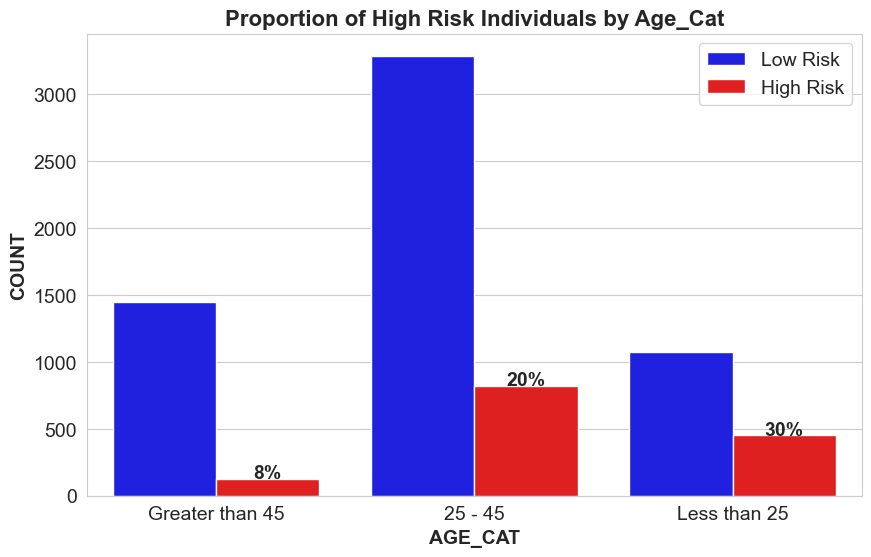

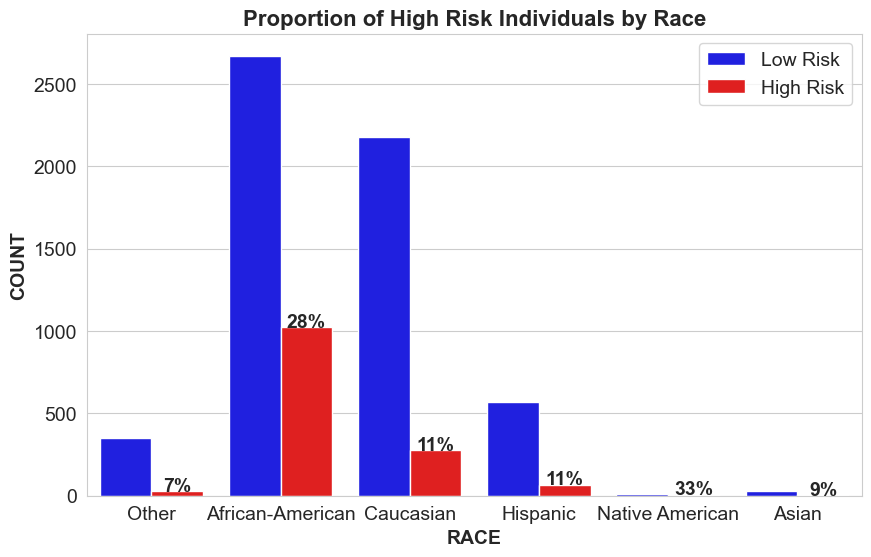

In [25]:
# Features to loop through
features = ['sex', 'age_cat', 'race']

# Plot for each feature
for feature in features:
    plot_data = []
    for category in data[feature].unique():
        high_risk = data[(data[feature] == category) & (data['high_risk'])].shape[0]
        low_risk = data[(data[feature] == category) & (~data['high_risk'])].shape[0]
        plot_data.append({feature: category, 'count': low_risk, 'status': 'Low Risk'})
        plot_data.append({feature: category, 'count': high_risk, 'status': 'High Risk'})
        

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature, y='count', hue='status', data=plot_df, palette={'High Risk': 'red', 'Low Risk': 'blue'})

    # Add percentage on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        try:
            category = plot_df.loc[(plot_df['count'] == height) & (plot_df['status'] == 'High Risk'), feature].values[0]
            total_count = data[data[feature] == category].shape[0]
            if height > 0 and total_count > 0:
                ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2, y + height), ha='center', fontsize=14, fontweight='bold')
        except:
            pass

    plt.title(f'Proportion of High Risk Individuals by {feature.title()}', fontsize=16, fontweight='bold')
    plt.xlabel(feature.upper(), fontsize=14, fontweight='bold')
    plt.ylabel('COUNT', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()

The visuals already show big differences across different groups on Age and Race:  
- Individuals under 25 years of age have a high-risk rate of 30%, which is nearly four times higher than the high-risk rate of 8% among individuals aged 45 and older. 
- If we look at African-American, they are almost three times more likely to be high risk individuals at a 28% rate rather than Caucasian individuals at an 11% rate,  
this is also true for Native Amricans compared to Caucasians. 


High Risk individual (Lvl 7 -10)

****** High Risk 7-10 **********
Total Individuals of High Risk: 1995
Percent of High Risk: 27.65%




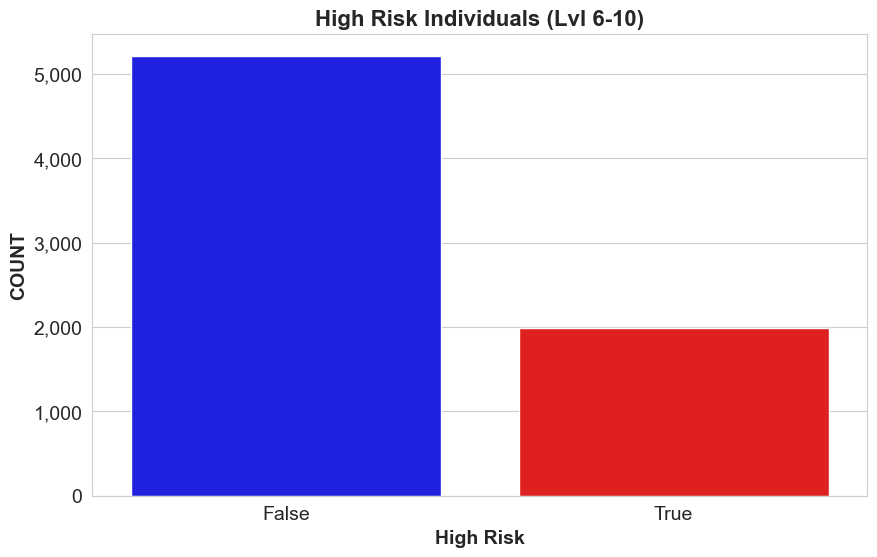

In [26]:
# Identify high risk individuals for level 7 to 10
data['high_risk'] = data['decile_score'] > 6
print("****** High Risk 7-10 **********")
print("Total Individuals of High Risk:", data['high_risk'].sum())
print(f"Percent of High Risk: {data['high_risk'].sum()/7214*100:.2f}%\n\n")

# PLOT 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[['high_risk']], x ='high_risk', palette=custom_palette )
ax.set_title('High Risk Individuals (Lvl 6-10)', fontsize=16, fontweight='bold')
ax.set_xlabel('High Risk', fontsize=14, fontweight='bold')
ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()


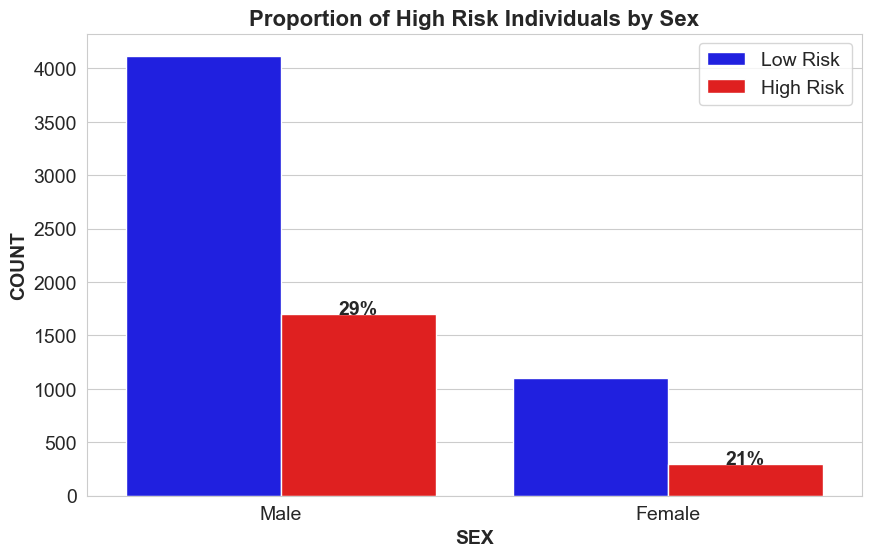

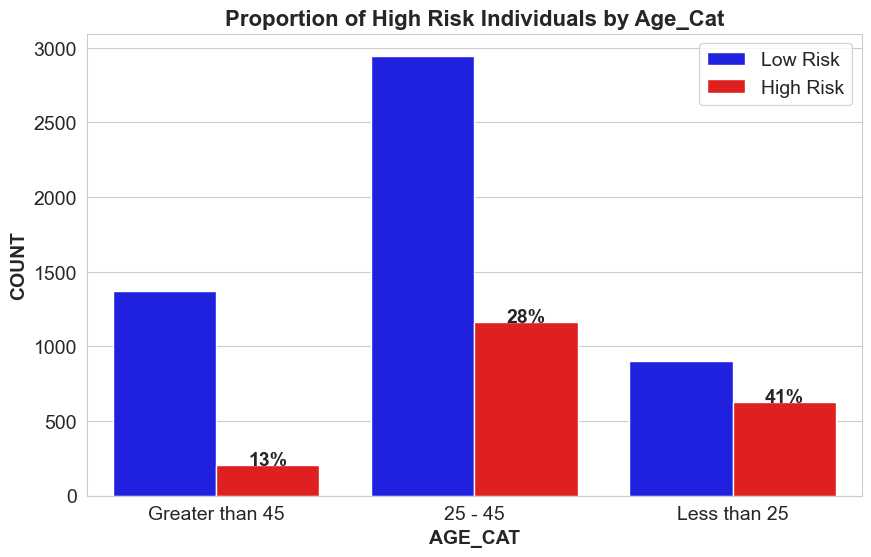

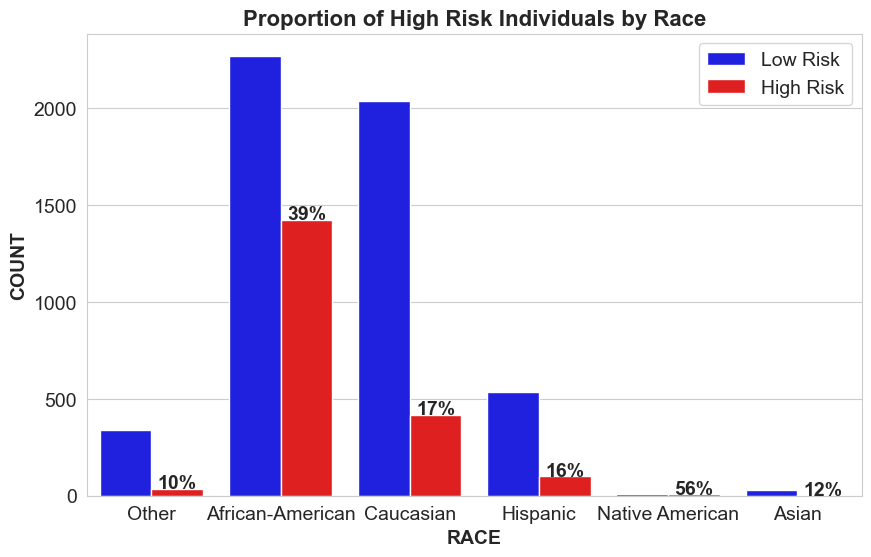

In [27]:
# Features to loop through
features = ['sex', 'age_cat', 'race']

# Plot for each feature
for feature in features:
    plot_data = []
    for category in data[feature].unique():
        high_risk = data[(data[feature] == category) & (data['high_risk'])].shape[0]
        low_risk = data[(data[feature] == category) & (~data['high_risk'])].shape[0]
        plot_data.append({feature: category, 'count': low_risk, 'status': 'Low Risk'})
        plot_data.append({feature: category, 'count': high_risk, 'status': 'High Risk'})
        

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature, y='count', hue='status', data=plot_df, palette={'High Risk': 'red', 'Low Risk': 'blue'})

    # Add percentage on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        try:
            category = plot_df.loc[(plot_df['count'] == height) & (plot_df['status'] == 'High Risk'), feature].values[0]
            total_count = data[data[feature] == category].shape[0]
            if height > 0 and total_count > 0:
                ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2, y + height), ha='center', fontsize=14, fontweight='bold')
        except:
            pass

    plt.title(f'Proportion of High Risk Individuals by {feature.title()}', fontsize=16, fontweight='bold')
    plt.xlabel(feature.upper(), fontsize=14, fontweight='bold')
    plt.ylabel('COUNT', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()

Increasing the level for High Risk Individuals continues to showcase the same trends previously seen.

COMPASS Lvl

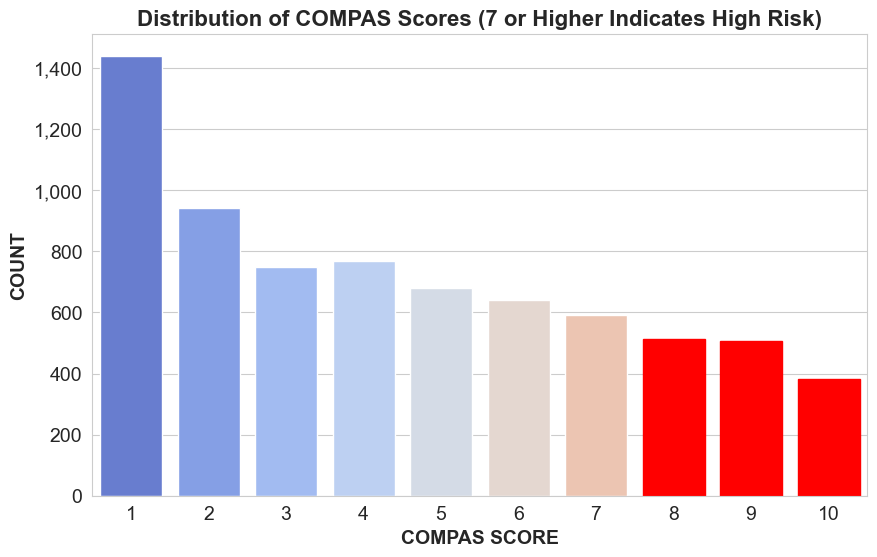

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='decile_score', data=data, palette='coolwarm')

# Highlight scores of 7 or higher
for p in ax.patches:
    if p.get_x() + 1 >= 7:
        p.set_color('red')

ax.set_title('Distribution of COMPAS Scores (7 or Higher Indicates High Risk)', fontsize=16, fontweight='bold')
ax.set_xlabel('COMPAS SCORE', fontsize=14, fontweight='bold')
ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

Here we can identify the distribution across the levels, we can start by saying that is not normally distributed and besides level 1-2 we have similar numbers  
on each particular level.  

JAIL

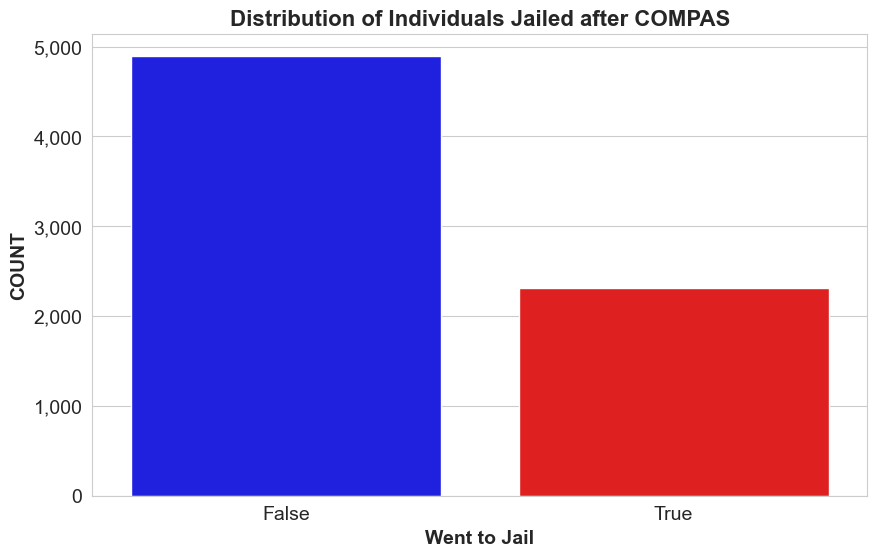

Total Individuals Jailed after COMPAS:  2316
Percent of Jailed after COMPAS: 32.10%


In [29]:
# Determine jail status based on r_jail_in column
data['went_to_jail'] = ~data['r_jail_in'].isnull()

# Create a plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[['went_to_jail']], x ='went_to_jail', palette=custom_palette )

ax.set_title('Distribution of Individuals Jailed after COMPAS', fontsize=16, fontweight='bold')
ax.set_xlabel('Went to Jail', fontsize=14, fontweight='bold')
ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

jailed = 7214 - data['r_jail_in'].isnull().sum()
print("Total Individuals Jailed after COMPAS: ", jailed)
print(f"Percent of Jailed after COMPAS: {jailed/7214*100:.2f}%")

Here we can see that 32% of Individuals endup in Jail, which is more than the initial 19% prediction. Next we would like to see how many of each level endup in Jail 

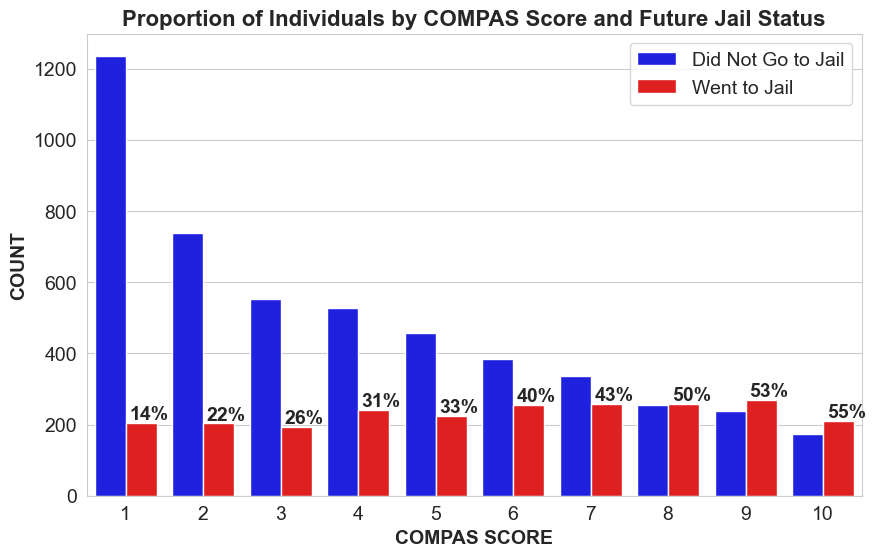

In [30]:
# Prepare data for plot
plot_data = []
for score in range(1, 11):
    jail_count = data[(data['decile_score'] == score) & (data['went_to_jail'])].shape[0]
    no_jail_count = data[(data['decile_score'] == score) & (~data['went_to_jail'])].shape[0]
    plot_data.append({'decile_score': score, 'count': no_jail_count, 'status': 'Did Not Go to Jail'})
    plot_data.append({'decile_score': score, 'count': jail_count, 'status': 'Went to Jail'})
    

plot_df = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='decile_score', y='count', hue='status', data=plot_df, palette={'Went to Jail': 'red', 'Did Not Go to Jail': 'blue'})

# Add percentage on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    
    total_count = data[data['decile_score'] == p.get_x() + 1].shape[0]
    if height > 0 and total_count > 0:
        ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2 + .1, y + height + 10), ha='center', fontsize=14, fontweight='bold')

plt.title('Proportion of Individuals by COMPAS Score and Future Jail Status', fontsize=16, fontweight='bold')
plt.xlabel('COMPAS SCORE', fontsize=14, fontweight='bold')
plt.ylabel('COUNT', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

This is a really interesting finding: we can observe that at least 14% of individuals from each COMPAS level ended up in jail again (for some, it was their first time).  
Even for the highest COMPAS ranked individuals at level 10, only 55% of them ended up returning to jail. When examining the levels,  
it becomes apparent that starting from level 8, individuals were more likely to return to jail, but this return rate remained below 60%.    

If the Judge based only on COMPAS levels, it will have missed to sentence 40% of Individuals at levels 6 and 7 

Proportion of Jail by Feature

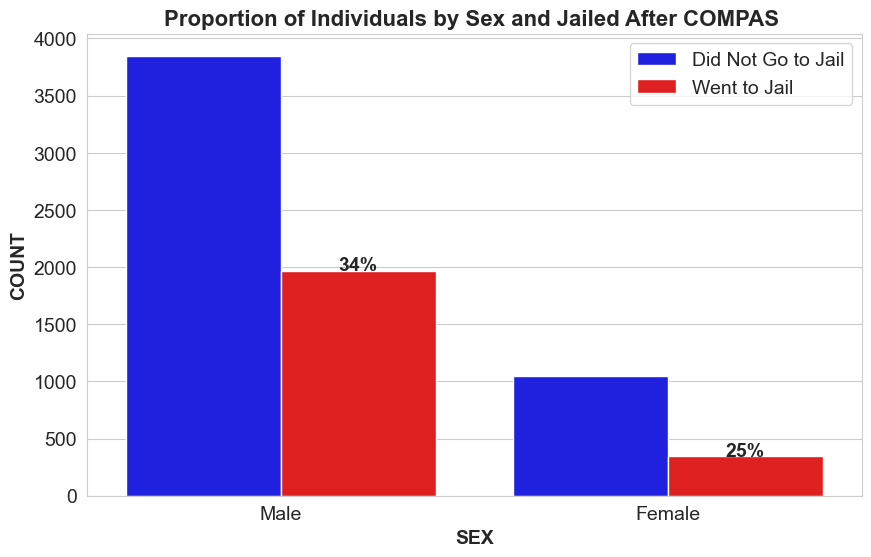

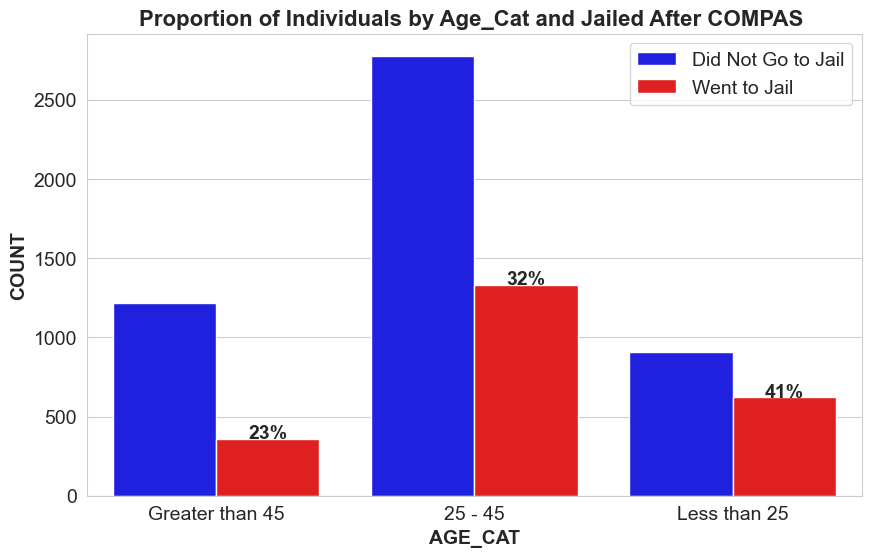

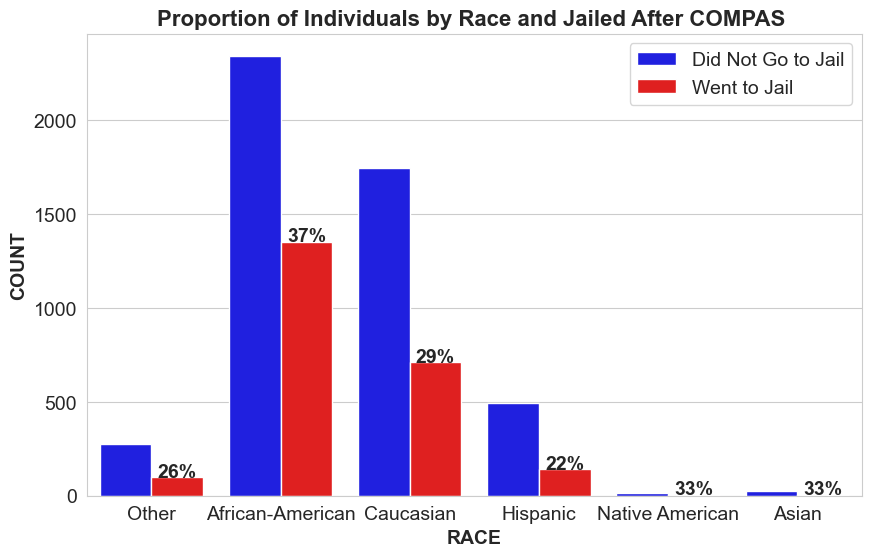

In [31]:
# Features to loop through
features = ['sex', 'age_cat', 'race']

# Plot for each feature
for feature in features:
    plot_data = []
    for category in data[feature].unique():
        jail_count = data[(data[feature] == category) & (data['went_to_jail'])].shape[0]
        no_jail_count = data[(data[feature] == category) & (~data['went_to_jail'])].shape[0]
        plot_data.append({feature: category, 'count': no_jail_count, 'status': 'Did Not Go to Jail'})
        plot_data.append({feature: category, 'count': jail_count, 'status': 'Went to Jail'})
        

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature, y='count', hue='status', data=plot_df, palette={'Went to Jail': 'red', 'Did Not Go to Jail': 'blue'})

    # Add percentage on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        try:
            category = plot_df.loc[(plot_df['count'] == height) & (plot_df['status'] == 'Went to Jail'), feature].values[0]
            total_count = data[data[feature] == category].shape[0]
            if height > 0 and total_count > 0:
                ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2, y + height), ha='center', fontsize=14, fontweight='bold')
        except:
            pass

    plt.title(f'Proportion of Individuals by {feature.title()} and Jailed After COMPAS ', fontsize=16, fontweight='bold')
    plt.xlabel(feature.upper(), fontsize=14, fontweight='bold')
    plt.ylabel('COUNT', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()


Here, we can observe that the levels of incarceration closely mirror the levels of predicting high risk across age and race, with slightly narrower margins than the     
COMPAS levels. In this case, individuals over 45 were half as likely to commit a crime compared to those under 25. When comparing African-Americans to Caucasians,   
we find an 8% difference in incarceration rates.  

The reduction in rates across these groups might suggest potential weaknesses in the current COMPAS levels. However, it's essential to note that this is just a hypothesis,   
and a more in-depth analysis will be required beyond the scope of this project.  

Proportion of Jail by Individuals on High Risk (8-10)

In [32]:
# Let's look first at the Total number of High Risk Individulas arrested again
total_high_risk = data[(data['decile_score'] > 7)].shape[0]
total_high_risk_recid = data[(data['decile_score'] > 7) & (data['went_to_jail'] == 1)].shape[0]
print(f"Percent of High Risk individuals Jailed After COMPASS in all data: {total_high_risk_recid / total_high_risk*100:.2f}%")

total_low_risk = data[(data['decile_score'] < 8)].shape[0]
total_low_risk_recid = data[(data['decile_score'] < 8) & (data['went_to_jail'] == 1)].shape[0]
print(f"Percent of Low Risk individuals Jailed After COMPASS in all data: {total_low_risk_recid/total_low_risk*100:.2f}%")


Percent of High Risk individuals Jailed After COMPASS in all data: 52.53%
Percent of Low Risk individuals Jailed After COMPASS in all data: 27.17%


This tell us that the COMPAS screening failed to predict 27% of individuals going to fail on lower risks, at the same time the COMPAS screening would have sent,  
48% of individuals wrongly to jail.  

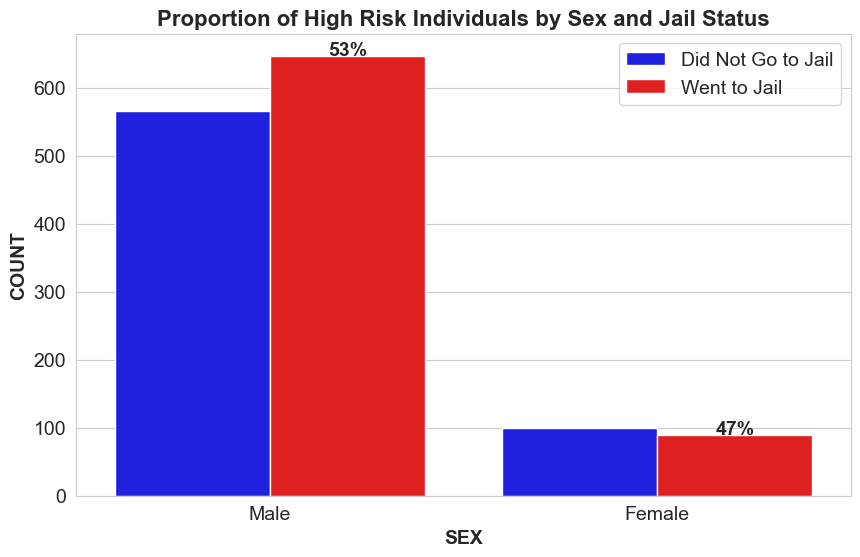

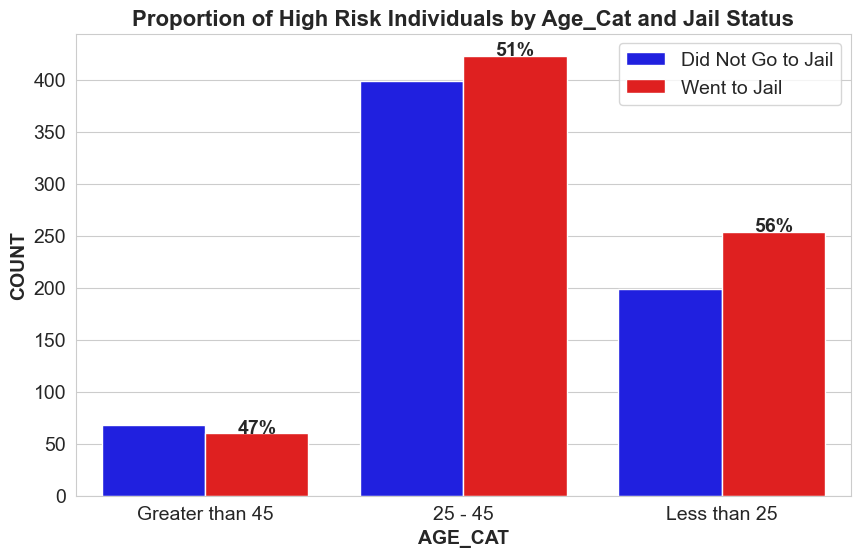

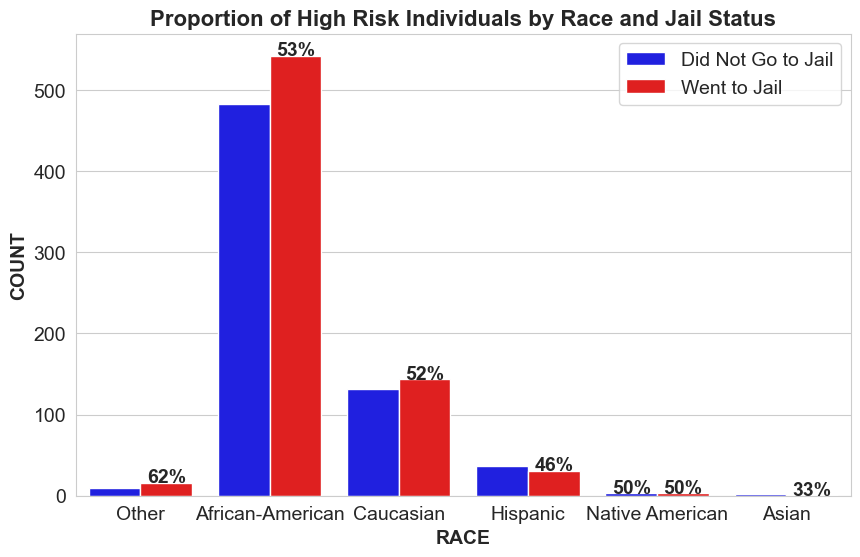

In [33]:
# Features to loop through
features = ['sex', 'age_cat', 'race']

# Plot for each feature
for feature in features:
    plot_data = []
    for category in data[feature].unique():
        jail_count = data[(data[feature] == category) & (data['decile_score'] > 7) & (data['went_to_jail'])].shape[0]
        no_jail_count = data[(data[feature] == category) & (data['decile_score'] >7 ) & (~data['went_to_jail'])].shape[0]
        plot_data.append({feature: category, 'count': no_jail_count, 'status': 'Did Not Go to Jail'})
        plot_data.append({feature: category, 'count': jail_count, 'status': 'Went to Jail'})
        

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature, y='count', hue='status', data=plot_df, palette={'Went to Jail': 'red', 'Did Not Go to Jail': 'blue'})

    # Add percentage on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        try:
            category = plot_df.loc[(plot_df['count'] == height) & (plot_df['status'] == 'Went to Jail'), feature].values[0]
            total_count = data[(data[feature] == category) & (data['decile_score'] > 7)].shape[0]
            if height > 0 and total_count > 0:
                ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2, y + height), ha='center', fontsize=14, fontweight='bold')
        except:
            pass

    plt.title(f'Proportion of High Risk Individuals by {feature.title()} and Jail Status', fontsize=16, fontweight='bold')
    plt.xlabel(feature.upper(), fontsize=14, fontweight='bold')
    plt.ylabel('COUNT', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()

This last figures make a really important relation, if we look at all high risk individuals across age, race and sex, they all had the same likelyhood to end up in jail again  
now we can really ask, why we dont see this same distribution in selecting high risk individuals?

## Arrested Again (is_recid)

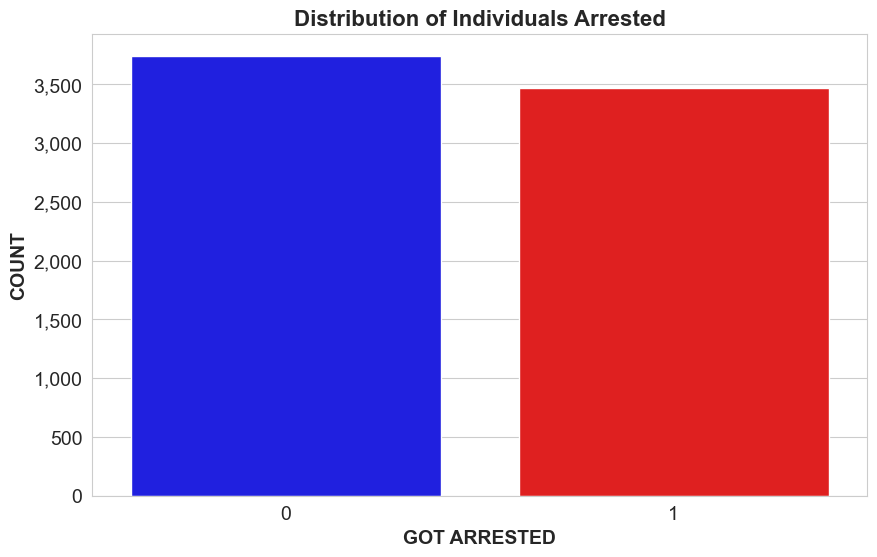

Total Individuals Arrested:  3743
Percent of Arrested After COMPASS in all data: 51.89%


In [34]:
# Determine Arrested status based on r_jail_in column
data['got_arrested'] = data[['is_recid']]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[['got_arrested']], x ='got_arrested', palette=custom_palette )
ax.set_title('Distribution of Individuals Arrested', fontsize=16, fontweight='bold')
ax.set_xlabel('GOT ARRESTED', fontsize=14, fontweight='bold')
ax.set_ylabel('COUNT', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Arrested insights 
arrested = 7214 - data['got_arrested'].sum()
print("Total Individuals Arrested: ", arrested)
print(f"Percent of Arrested After COMPASS in all data: {arrested/7214*100:.2f}%")

If the 19.4% COMPAS level predicted who will commit a crime again, we can say that now failed to predict 30% of individuals that commited a crime again.  
Where does that 30% comes from? 

COMPAS LvL & Arrested Cases

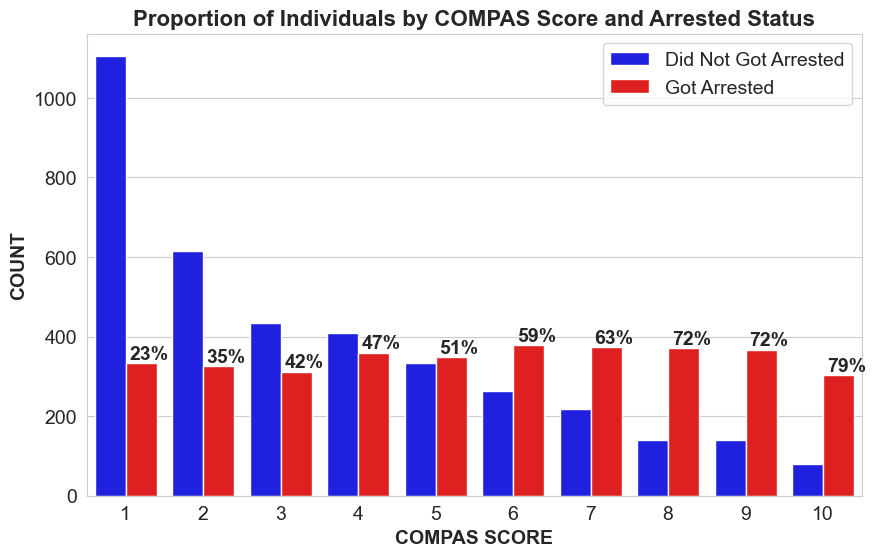

In [35]:

# Prepare data for plot
plot_data = []
for score in range(1, 11):
    jail_count = data[(data['decile_score'] == score) & (data['got_arrested'])].shape[0]
    no_jail_count = data[(data['decile_score'] == score) & (~data['got_arrested'])].shape[0]
    plot_data.append({'decile_score': score, 'count': no_jail_count, 'status': 'Did Not Got Arrested'})
    plot_data.append({'decile_score': score, 'count': jail_count, 'status': 'Got Arrested'})
    

plot_df = pd.DataFrame(plot_data)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='decile_score', y='count', hue='status', data=plot_df, palette={'Got Arrested': 'red', 'Did Not Got Arrested': 'blue'})

# Add percentage on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    
    total_count = data[data['decile_score'] == p.get_x() + 1].shape[0]
    if height > 0 and total_count > 0:
        ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2 + .1, y + height + 10), ha='center', fontsize=14, fontweight='bold')

plt.title('Proportion of Individuals by COMPAS Score and Arrested Status', fontsize=16, fontweight='bold')
plt.xlabel('COMPAS SCORE', fontsize=14, fontweight='bold')
plt.ylabel('COUNT', fontsize=14, fontweight='bold')
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

We observe a similar pattern as with individuals who went to jail, but in this case, the rates are higher across each group. However, it also highlights many weaknesses in the   COMPAS screening. From levels 4 to 7, it often failed to predict individuals who would commit a crime again. Starting from level 5, people are more likely to reoffend.  

Regarding the predictability of COMPAS, if we examine level 10, it accurately predicted that 79% of individuals would commit a crime. While 79% may seem acceptable to some,   
when this system impacts an individual's life, the perspective changes. If someone tells me that my flight will arrive at the destination 79% of the time, I might choose   
not to fly again.

Arrested by Age, Race, Sex

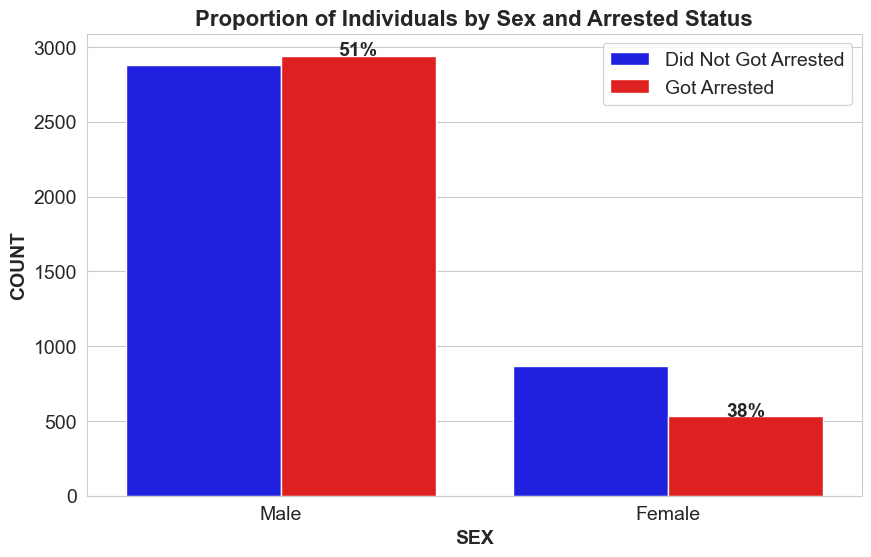

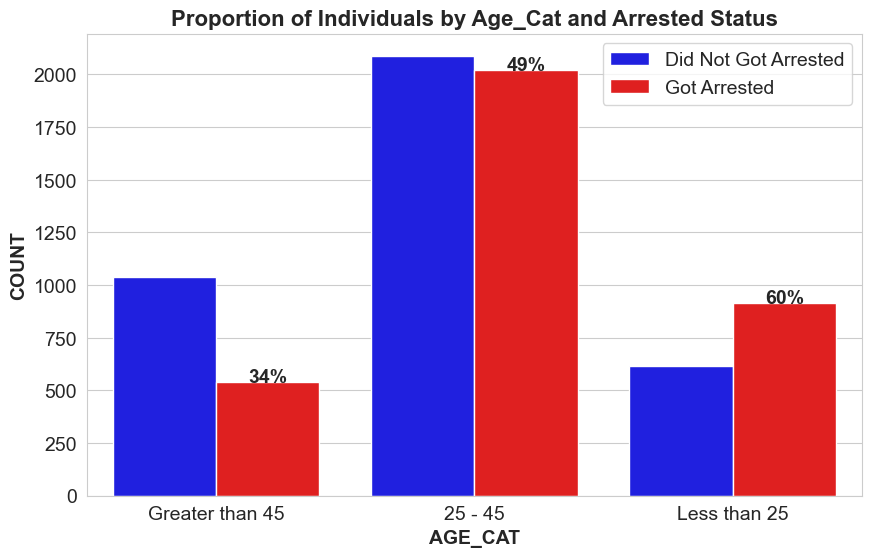

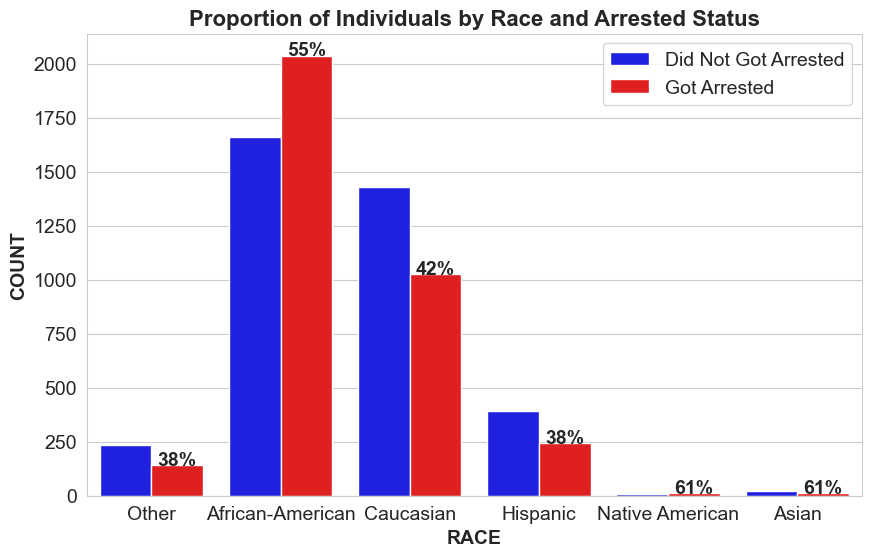

In [36]:
# Features to loop through
features = ['sex', 'age_cat', 'race']

# Plot for each feature
for feature in features:
    plot_data = []
    for category in data[feature].unique():
        jail_count = data[(data[feature] == category) & (data['got_arrested'])].shape[0]
        no_jail_count = data[(data[feature] == category) & (~data['got_arrested'])].shape[0]
        plot_data.append({feature: category, 'count': no_jail_count, 'status': 'Did Not Got Arrested'})
        plot_data.append({feature: category, 'count': jail_count, 'status': 'Got Arrested'})
        

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature, y='count', hue='status', data=plot_df, palette={'Got Arrested': 'red', 'Did Not Got Arrested': 'blue'})

    # Add percentage on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        try:
            category = plot_df.loc[(plot_df['count'] == height) & (plot_df['status'] == 'Got Arrested'), feature].values[0]
            total_count = data[data[feature] == category].shape[0]
            if height > 0 and total_count > 0:
                ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2, y + height), ha='center', fontsize=14, fontweight='bold')
        except:
            pass

    plt.title(f'Proportion of Individuals by {feature.title()} and Arrested Status', fontsize=16, fontweight='bold')
    plt.xlabel(feature.upper(), fontsize=14, fontweight='bold')
    plt.ylabel('COUNT', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()

We observe a similar pattern as with individuals going to jail again, but with higher rates. Notably, 42% of Caucasians ended up committing a crime again, while 55% of   African-Americans did. This represents a 13% difference, which is considerably smaller than the three times higher likelihood of an African American being classified as high   risk compared to a Caucasian.  

What the 42% rate of reoffending among Caucasian individuals suggests is that only 11% of Caucasian individuals were accurately classified as high risk by COMPAS. This stark difference is perhaps the most prominent point of injustice that becomes evident if the COMPAS level was the final call.  

Proportion of Arrested by each sensitive feature for Individuals on High Risk (8-10)

In [37]:
# Let's look first at the Total number of High Risk Individulas arrested again
total_high_risk = data[(data['decile_score'] > 7)].shape[0]
total_high_risk_recid = data[(data['decile_score'] > 7) & (data['is_recid'] == 1)].shape[0]
print(f"Percent of High Risk individuals Arrested After COMPASS in all data: {total_high_risk_recid / total_high_risk*100:.2f}%")

total_low_risk = data[(data['decile_score'] < 8)].shape[0]
total_low_risk_recid = data[(data['decile_score'] < 8) & (data['is_recid'] == 1)].shape[0]
print(f"Percent of Low Risk individuals Arrested After COMPASS in all data: {total_low_risk_recid/total_low_risk*100:.2f}%")


Percent of High Risk individuals Arrested After COMPASS in all data: 74.20%
Percent of Low Risk individuals Arrested After COMPASS in all data: 41.82%


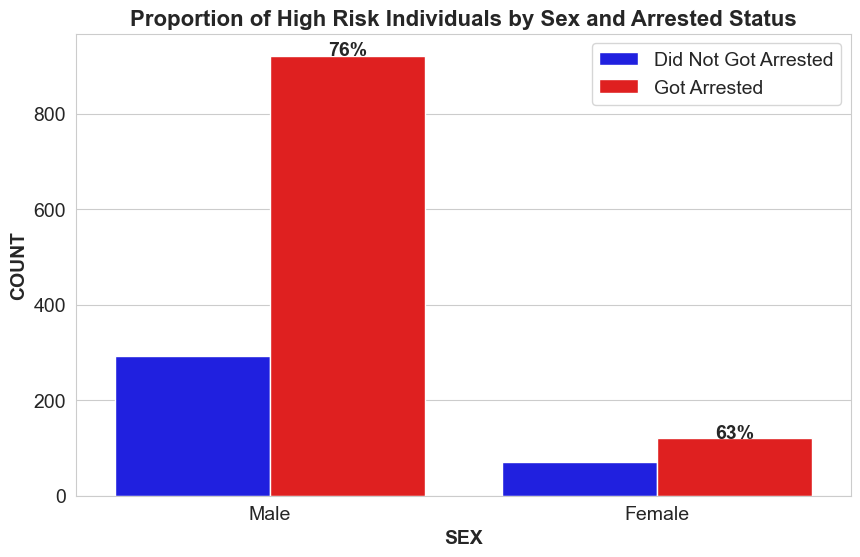

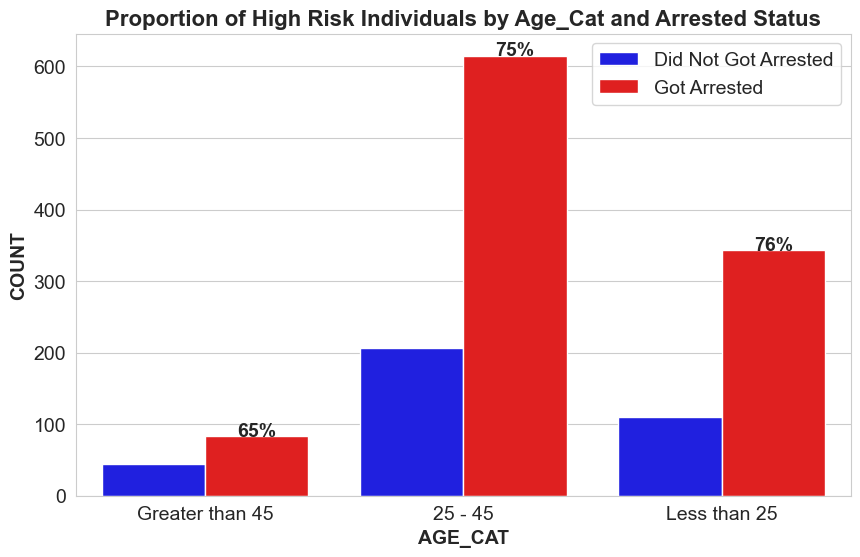

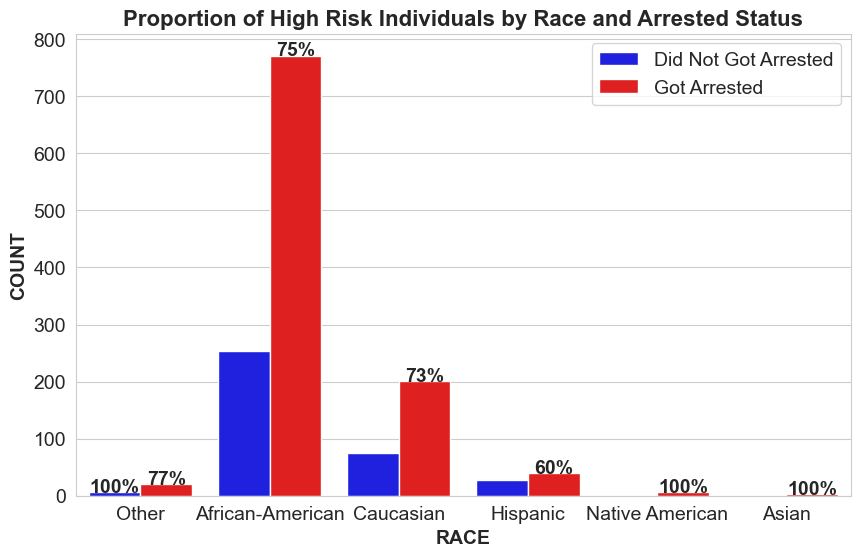

In [38]:
# Features to loop through
features = ['sex', 'age_cat', 'race']

# Plot for each feature
for feature in features:
    plot_data = []
    for category in data[feature].unique():
        jail_count = data[(data[feature] == category) & (data['decile_score'] > 7) & (data['got_arrested'])].shape[0]
        no_jail_count = data[(data[feature] == category) & (data['decile_score'] > 7) & (~data['got_arrested'])].shape[0]
        plot_data.append({feature: category, 'count': no_jail_count, 'status': 'Did Not Got Arrested'})
        plot_data.append({feature: category, 'count': jail_count, 'status': 'Got Arrested'})
        

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature, y='count', hue='status', data=plot_df, palette={'Got Arrested': 'red', 'Did Not Got Arrested': 'blue'})

    # Add percentage on top of the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        try:
            category = plot_df.loc[(plot_df['count'] == height) & (plot_df['status'] == 'Got Arrested'), feature].values[0]
            total_count = data[(data['decile_score'] > 7) & (data[feature] == category)].shape[0]
            if height > 0 and total_count > 0:
                ax.annotate(f'{(height/total_count)*100:.0f}%', (x + width/2, y + height), ha='center', fontsize=14, fontweight='bold')
        except:
            pass

    plt.title(f'Proportion of High Risk Individuals by {feature.title()} and Arrested Status', fontsize=16, fontweight='bold')
    plt.xlabel(feature.upper(), fontsize=14, fontweight='bold')
    plt.ylabel('COUNT', fontsize=14, fontweight='bold')
    plt.legend(fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.show()

Again, across all high risk individuals we see really close rates of re offending across each group. At the same time, we can say that 25% of African-American  
were wronly sentenced by COMPAS levels.  

## Data Processing

## Bias

Now that we have made sense of the Data and done our initial investigation with the Visuals, is time to correlate those findings with the numbers.  
For that we will use the bias detection tool of aif360.  
Before we use the tool we need to indentify what are we measuring, the propose of the project is to identify any bias in the COMPAS assessment.  
With that in mind, our main output is to identify bias for predicting high risk individuals by the COMPAS assessment. First we will update the data,  
to only include meaningful features produced before the COMPAS assessment, the we use the COMPAS output to discover any bias across age, sex and ethnic.  
At the same time, we can also look for bias across the the future convictions, but for this particular case, this bias wouldn't be against the COMPAS  
assessment and more towards the Criminal System.  

In [39]:
data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'went_to_jail', 'high_risk',
       'got_arrested'],
      dtype='object

In [40]:
# Let's load the variables we will use for the Bias Check 
variables_before_compas = [
    "id",
    "sex",
    "age",
    "race",
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count",
    "c_jail_in",
    "c_jail_out",
    "c_charge_degree",
    "high_risk",
    'went_to_jail',
    #'is_recid'
]

In [41]:
# Create a copy of the data
data['high_risk'] = data['decile_score'] > 7
data_cleaned = data[variables_before_compas].copy()

# I'm going to add a new feature for days in jail, this feature will replace the jail in and out
# I'm also going to add a + 1 for all the cases as when they left on same day is as 0, then the NA will be 0 as they never went to jail
data_cleaned['c_jail_out'] = pd.to_datetime(data_cleaned['c_jail_out'], errors='coerce')
data_cleaned['c_jail_in'] = pd.to_datetime(data_cleaned['c_jail_in'], errors='coerce')
data_cleaned["days_jail"] = (data_cleaned["c_jail_out"] - data_cleaned["c_jail_in"]).dt.days + 1
data_cleaned["days_jail"] = data_cleaned["days_jail"].fillna(0)
data_cleaned["days_jail"] = data_cleaned["days_jail"].astype(int)
data_cleaned.drop(["c_jail_out", "c_jail_in"], axis=1, inplace= True)

#Convert the Features 
data_cleaned["predict_feat"] = data_cleaned["high_risk"].map({True: 1, False: 0})
data_cleaned.drop(["high_risk"], axis=1, inplace=True)
#data_cleaned["went_to_jail"] = data_cleaned["went_to_jail"].map({True: 1, False: 0})

# Making age categorical 
bins = [18, 25, 45, 65, 100]
labels = ['18_to_25', '25_to_45', '45_to_65', '65_and_over']

# Create a new categorical column
data_cleaned['age_sen_cat'] = pd.cut(data_cleaned['age'], bins=bins, labels=labels, right=False)

In [42]:
data_cleaned.columns = ['id', 'sex_cat_sen', 'age_sen', 'race_cat_sen', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree_cat', 'went_to_jail_cat',
       'days_jail', 'predict_feat', 'age_sen_cat']

## Split the Data

In [43]:
from sklearn.model_selection import train_test_split

# Assuming 'prediction' is the target variable and the rest are features
#data_cleaned.drop('prediction', axis=1)  

# Split the data into training and test sets
train, test = train_test_split(data_cleaned, test_size=0.2, stratify=data_cleaned["predict_feat"])

# X_train, y_train are the features and target for the training set
# X_test, y_test are the features and target for the test set


In [44]:
data_cleaned.to_csv("../Output/compass_cleaned.csv", index=False)
train.to_csv("../Output/compass_cleaned_train.csv", index=False)
test.to_csv("../Output/compass_cleaned_test.csv", index=False)

## Make a Prediction KNN

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [46]:
train = train.drop(["id"], axis=1)
test = test.drop(["id"], axis=1)

In [47]:
X_train = train.drop(["predict_feat"], axis = 1)
y_train = train["predict_feat"]
X_test = test.drop(["predict_feat"], axis = 1)
y_test = test["predict_feat"]

In [48]:
# Separate numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [49]:
# Define the KNN model
knn_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # You can adjust the number of neighbors (k) here
])

# Train the model
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age_sen', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['sex_cat_sen', 'race_cat_sen', 'c_charge_degree_cat'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [50]:
y_train

7025    0
2924    0
3441    0
4497    0
4745    0
       ..
6413    0
2483    0
5062    0
3419    0
1372    0
Name: predict_feat, Length: 5771, dtype: int64

In [51]:
# Evaluate the model on test data
accuracy = knn_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8156618156618156


In [52]:
predictions = knn_model.predict(X_test)

In [53]:
test['prediction'] = predictions

In [54]:
test.to_csv("../Output/test_outcome.csv", index=False)

In [55]:
test.groupby(["race_cat_sen"])['prediction'].value_counts(normalize=True)

race_cat_sen      prediction
African-American  0             0.805195
                  1             0.194805
Asian             0             1.000000
Caucasian         0             0.950644
                  1             0.049356
Hispanic          0             0.925373
                  1             0.074627
Native American   0             0.500000
                  1             0.500000
Other             0             0.955224
                  1             0.044776
Name: proportion, dtype: float64

In [56]:
test

,sex_cat_sen,age_sen,race_cat_sen,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree_cat,went_to_jail_cat,days_jail,predict_feat,age_sen_cat,prediction
5266,Male,41,Caucasian,0,0,0,0,M,False,1,0,25_to_45,0
5916,Male,43,African-American,0,0,0,2,M,False,3,0,25_to_45,0
2225,Male,32,Other,0,0,0,0,F,True,23,0,25_to_45,0
5402,Female,26,African-American,0,0,0,6,F,True,4,0,25_to_45,0
4943,Male,23,Caucasian,0,0,0,0,M,True,1,0,18_to_25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,Female,24,Caucasian,0,0,0,0,F,False,1,0,18_to_25,0
4950,Female,49,African-American,0,0,0,1,F,False,0,0,45_to_65,0
5668,Male,77,Caucasian,0,0,0,1,M,False,4,0,65_and_over,0
4181,Male,55,Caucasian,0,0,0,0,M,True,0,0,45_to_65,0
